In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
df=pd.read_csv('insurence.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Feature Engineering

In [8]:
Male=pd.get_dummies(df['sex'])

In [9]:
Male

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


**Now we will drop the female bcoz it will have the same effect coz if female is 1 then male will be 0 only<br>
So we do not want to increase the parameter unnecessarily**

In [13]:
Male=pd.get_dummies(df['sex'],drop_first=True)

In [14]:
df['male']=Male

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,male
0,19,female,27.9,0,yes,southwest,16884.92,0
1,18,male,33.8,1,no,southeast,1725.55,1
2,28,male,33.0,3,no,southeast,4449.46,1
3,33,male,22.7,0,no,northwest,21984.47,1
4,32,male,28.9,0,no,northwest,3866.86,1


**Same thing we do for smoker**

In [17]:
smoker=pd.get_dummies(df['smoker'],drop_first=True)

In [18]:
df['yes_smoker']=smoker
df.head()

,age,sex,bmi,children,smoker,region,expenses,male,yes_smoker
0,19,female,27.9,0,yes,southwest,16884.92,0,1
1,18,male,33.8,1,no,southeast,1725.55,1,0
2,28,male,33.0,3,no,southeast,4449.46,1,0
3,33,male,22.7,0,no,northwest,21984.47,1,0
4,32,male,28.9,0,no,northwest,3866.86,1,0


In [19]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Exploratory Analysis

**Distribution of Sex parameter**

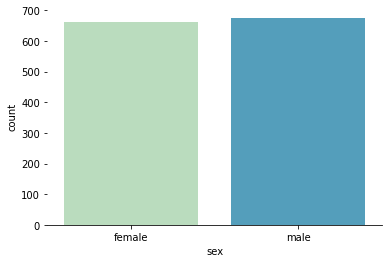

In [25]:
sns.countplot(x='sex',data=df,palette='GnBu')
sns.despine(left=True)  #Box is removed with this

### Relation of Smoking and Gender to charges

In [27]:
df.corr()

/var/folders/4d/gf6xkqsd5tx6m_zltry403dc0000gn/T/ipykernel_3132/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,expenses,male,yes_smoker
age,1.000000,0.109341,0.042469,0.299008,-0.020856,-0.025019
bmi,0.109341,1.000000,0.012645,0.198576,0.046380,0.003968
children,0.042469,0.012645,1.000000,0.067998,0.017163,0.007673
expenses,0.299008,0.198576,0.067998,1.000000,0.057292,0.787251
male,-0.020856,0.046380,0.017163,0.057292,1.000000,0.076185
yes_smoker,-0.025019,0.003968,0.007673,0.787251,0.076185,1.000000


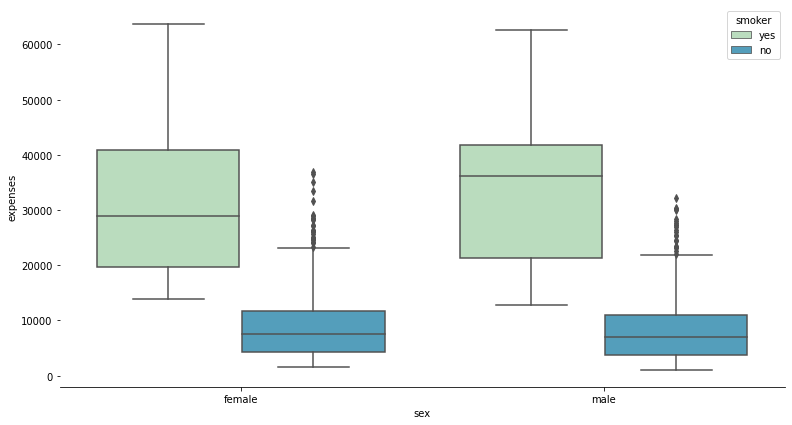

In [32]:
plt.figure(figsize=(13,7))
sns.boxplot(x='sex',y='expenses',data=df,palette='GnBu',hue='smoker')
sns.despine(left=True)  #Box is removed with this

**If the person is smoker the insurence is high bcoz he is more likely to feel ill**

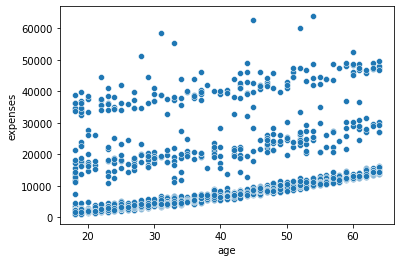

In [36]:
sns.scatterplot(x='age',y='expenses',data=df);

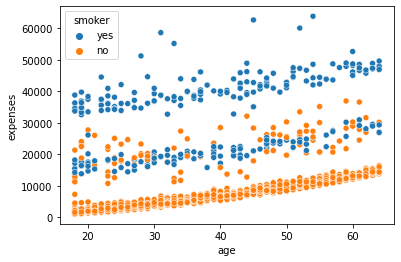

In [38]:
sns.scatterplot(x='age',y='expenses',data=df,hue='smoker');

**When you are young if you are a non smoker your charges will be less**

Lets check for BMI now, normally if our BMI is between 18.5 to 24.9 then it is in normal range

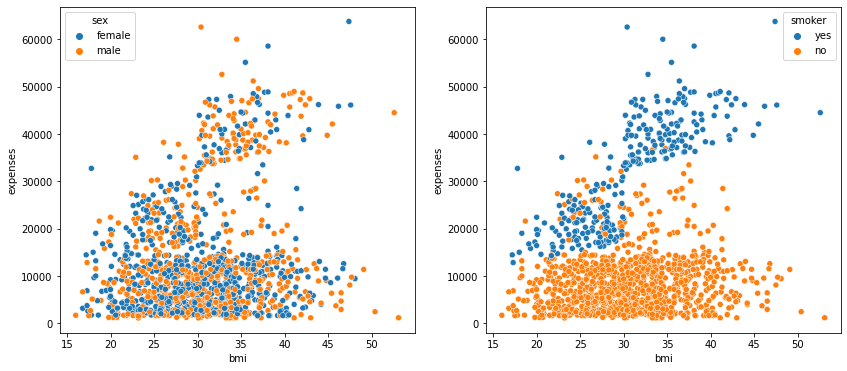

In [47]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
sns.scatterplot(x='bmi',y='expenses',data=df,hue='sex',ax=ax[0])
sns.scatterplot(x='bmi',y='expenses',data=df,hue='smoker',ax=ax[1]);

When bmi increases the charges increase

If we do not smoke even if our bmi is high then our chances for expenses is low

In [48]:
df.drop(['sex','smoker','region'],axis=1,inplace=True)

In [50]:
df.head()

,age,bmi,children,expenses,male,yes_smoker
0,19,27.9,0,16884.92,0,1
1,18,33.8,1,1725.55,1,0
2,28,33.0,3,4449.46,1,0
3,33,22.7,0,21984.47,1,0
4,32,28.9,0,3866.86,1,0


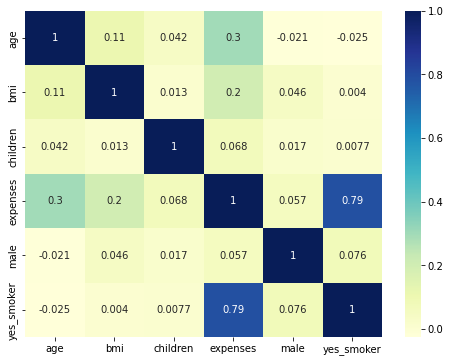

In [63]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu');

smoker is a very import parameter<br>
children and male are not that important parameter

## Splitting up the data

In [65]:
x=df.drop('expenses',axis=1)
y=df['expenses']

In [69]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [70]:
xtrain.shape

(1070, 5)

In [71]:
xtest.shape

(268, 5)

Let's scale the dataset so the ranges come closer so that we don't have a biased dataset

### Scaling dataset

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [73]:
scaled_x_train=scaler.fit_transform(xtrain)
scaled_x_test=scaler.transform(xtest) #We don't fit for test we only transform

In [74]:
scaled_x_train

array([[ 0.39111654,  0.73908264, -0.89120729, -1.02651975, -0.50874702],
       [ 1.73176724,  0.4945702 , -0.06271746, -1.02651975,  1.96561348],
       [-1.16121585, -0.36937374, -0.06271746, -1.02651975,  1.96561348],
       ...,
       [-0.03224684,  0.33156191, -0.89120729, -1.02651975, -0.50874702],
       [ 0.32055598, -0.54868286,  0.76577238,  0.97416538, -0.50874702],
       [ 1.09672217, -0.64648783, -0.06271746, -1.02651975, -0.50874702]])

### Support Vector Regression Model

In [75]:
from sklearn.svm import SVR

In [76]:
reg=SVR()
reg.fit(scaled_x_train,ytrain)

SVR()

In [77]:
predict=reg.predict(scaled_x_test)

In [78]:
predict.shape

(268,)

In [80]:
ytest.shape

(268,)

In [81]:
from sklearn.metrics import mean_squared_error

In [83]:
cost=mean_squared_error(ytest,predict)

In [84]:
cost

123884485.43857305

-123884385.43857305